<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.3 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138890 sha256=9e1d9db7bddf540c65942b0a1ea018cb8906888c42dabdf7eb10bae016fe59c7
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1c/09/7e/9f659fde248ecdc1722a142c1d744271aad3914a0afc191058
Successfully built peewee


In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [7]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [8]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [44]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [45]:
tesla_data = tesla.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [46]:
tesla_data.reset_index(inplace=True)

print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [16]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

html_data = response.text

print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [17]:
from bs4 import BeautifulSoup

soup_html_parser = BeautifulSoup(html_data, 'html.parser')

print(soup_html_parser.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table')

headers = [header.text.strip() for header in table.find_all('th')]
print(f"Headers: {headers}")

rows = table.find_all('tr')[1:]  

data = []
for row in rows:
    columns = row.find_all('td')
    data.append([col.text.strip() for col in columns])

print("Extracted Data:")
for row in data:
    print(row)

tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

tesla_revenue.columns = ['Date', 'Revenue']

tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

print(tesla_revenue.head())

Headers: ['Tesla Annual Revenue(Millions of US $)']
Extracted Data:
['2021', '$53,823']
['2020', '$31,536']
['2019', '$24,578']
['2018', '$21,461']
['2017', '$11,759']
['2016', '$7,000']
['2015', '$4,046']
['2014', '$3,198']
['2013', '$2,013']
['2012', '$413']
['2011', '$204']
['2010', '$117']
['2009', '$112']
   Date  Revenue
0  2021  53823.0
1  2020  31536.0
2  2019  24578.0
3  2018  21461.0
4  2017  11759.0


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [27]:
# tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [28]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [29]:
print(tesla_revenue.tail())

    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [40]:
gamestop = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [58]:
gme_data = gamestop.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [47]:
gme_data.reset_index(inplace=True)

print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670627  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [48]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)

html_data = response.text

print(html_data[:500])

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [50]:
from bs4 import BeautifulSoup
import pandas as pd

soup = BeautifulSoup(response.text, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [51]:
able = soup.find('table')

headers = [header.text.strip() for header in table.find_all('th')]
print(f"Headers: {headers}")

rows = table.find_all('tr')[1:]  

data = []
for row in rows:
    columns = row.find_all('td')
    data.append([col.text.strip() for col in columns])

print("Extracted Data:")
for row in data:
    print(row)

gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

gme_revenue.columns = ['Date', 'Revenue']

gme_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

print(gme_revenue.head())

Headers: ['GameStop Annual Revenue(Millions of US $)']
Extracted Data:
['2020', '$6,466']
['2019', '$8,285']
['2018', '$8,547']
['2017', '$7,965']
['2016', '$9,364']
['2015', '$9,296']
['2014', '$9,040']
['2013', '$8,887']
['2012', '$9,551']
['2011', '$9,474']
['2010', '$9,078']
['2009', '$8,806']
['2008', '$7,094']
['2007', '$5,319']
['2006', '$3,092']
['2005', '$1,843']
   Date  Revenue
0  2020  53823.0
1  2019  31536.0
2  2018  24578.0
3  2017  21461.0
4  2016  11759.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [59]:
print(gme_revenue.tail())

    Date  Revenue
11  2009    117.0
12  2008    112.0
13  2007      NaN
14  2006      NaN
15  2005      NaN


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [35]:
!pip install matplotlib

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

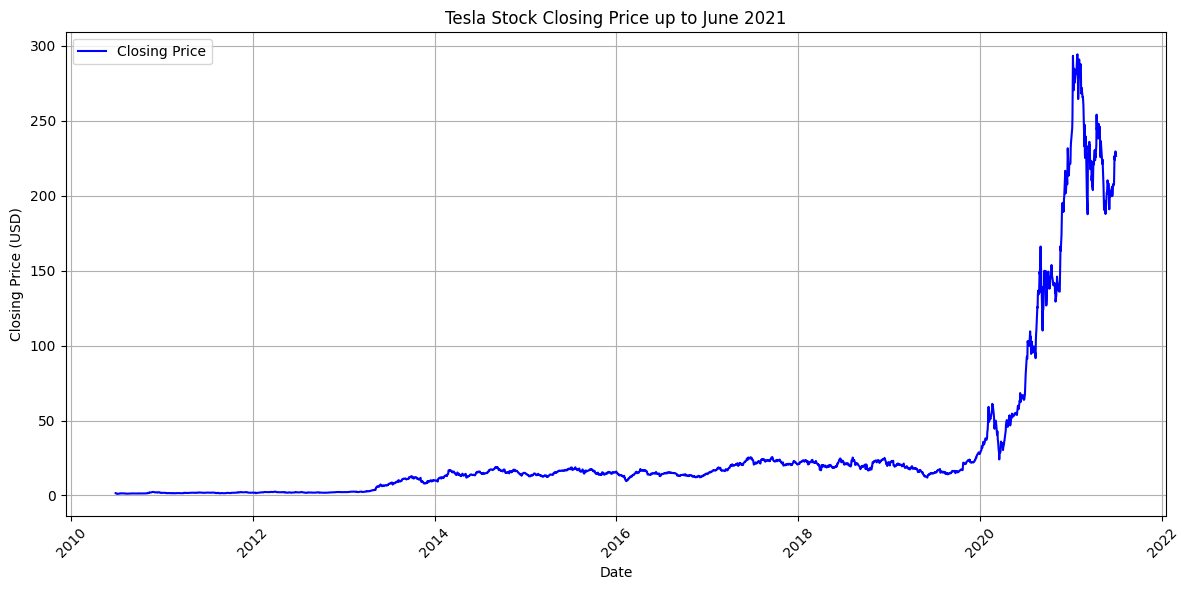

In [55]:
# Fetch Tesla stock data
ticker = 'TSLA'
tesla = yf.Ticker(ticker)
tesla_data = tesla.history(period='max')

# Reset index to get Date as a column
tesla_data.reset_index(inplace=True)

# Convert the Date column to datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Filter the data up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to fit the date labels
    plt.show()

# Use the function to plot the filtered data
make_graph(tesla_data_filtered, 'Tesla Stock Closing Price up to June 2021')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


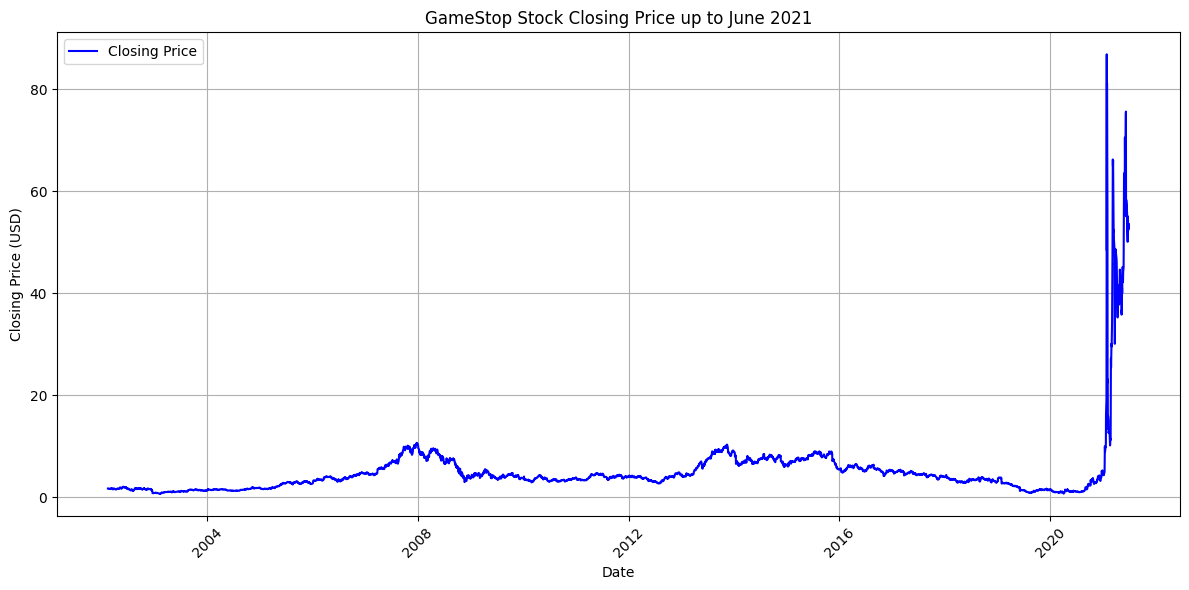

In [57]:
ticker = 'GME'
gme = yf.Ticker(ticker)
gme_data = gme.history(period='max')

# Reset index to get Date as a column
gme_data.reset_index(inplace=True)

# Convert the Date column to datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Filter the data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to fit the date labels
    plt.show()

# Use the function to plot the filtered GameStop data
make_graph(gme_data_filtered, 'GameStop Stock Closing Price up to June 2021')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
